In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df2 = pd.read_csv('./Test.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# statistical info
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
#Preprocessing the dataset

#check for NULL values in the dataset.

# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
 #remove unnecessary columns.

cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:


# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
#check for the missing values of Item_Weight.

miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [15]:
df['Item_Weight'].isnull().sum()

0

In [16]:
#check for the missing values of Outler_Type.

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
 #fill in the missing values for Outlet_Size.

miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [18]:
# check for Item_Visibility.

sum(df['Item_Visibility']==0)

526

In [19]:
#We have some missing values for this attribute. 

# fill in the missing values. 

# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(df['Item_Visibility']==0)


0

In [21]:
#combine the repeated Values of the categorical column. 

# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
#Creation of New Attributes

#We can create new attributes 'New_Item_Type' using existing attributes 'item_Identifier'. 

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
#After creating a new attribute, let's fill in some meaningful value in it.

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
#We have three categories of (Food, Non-Consumables and Drinks).

#We will use this 'Non_Consumable' category to represent the 'Fat_Content' which are 'Non-Edible'.
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
#create a new attribute to show small values for the establishment year.

# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [26]:
#print the dataframe.

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

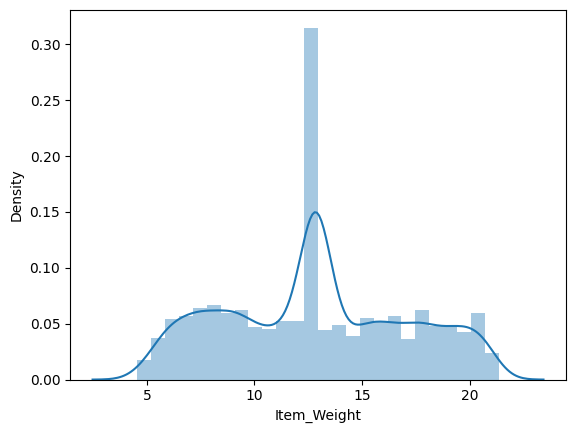

In [27]:
#Exploratory Data Analysis

# explore the numerical columns.

sns.distplot(df['Item_Weight'])

<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

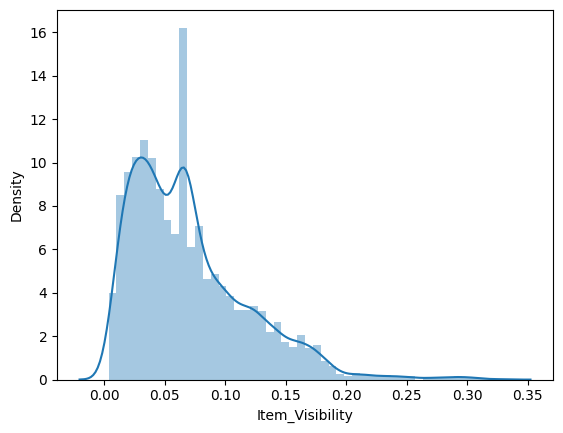

In [28]:
sns.distplot(df['Item_Visibility'])


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

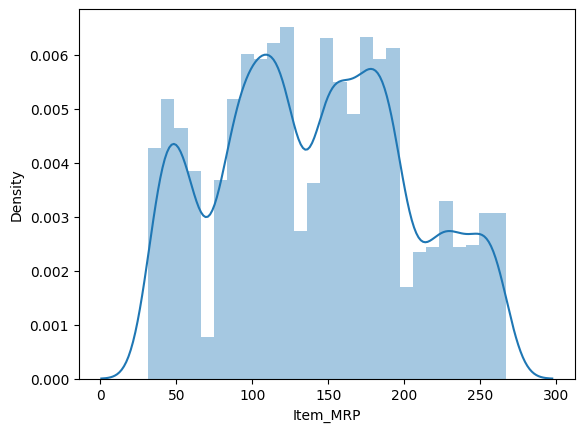

In [29]:
sns.distplot(df['Item_MRP'])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

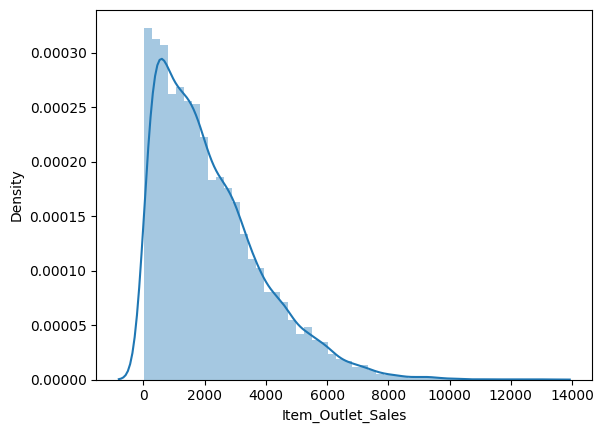

In [30]:
sns.distplot(df['Item_Outlet_Sales'])


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

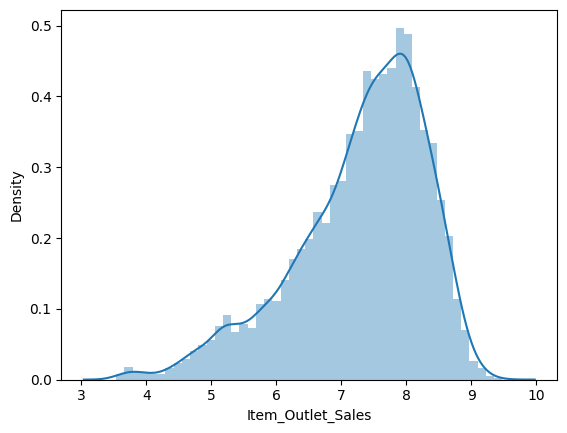

In [31]:
#Log transformation helps to make the highly skewed distribution less skewed.

# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

In [32]:
df.Item_Fat_Content

0          Low Fat
1          Regular
2          Low Fat
3          Regular
4       Non-Edible
           ...    
8518       Low Fat
8519       Regular
8520    Non-Edible
8521       Regular
8522       Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [33]:
# #explore the categorical columns.

# sns.countplot(df["Item_Fat_Content"])

In [34]:
# # plt.figure(figsize=(15,5))
# l = list(df['Item_Type'].unique())
# chart = sns.countplot(df["Item_Type"])
# chart.set_xticklabels(labels=l, rotation=90)


<AxesSubplot: ylabel='count'>

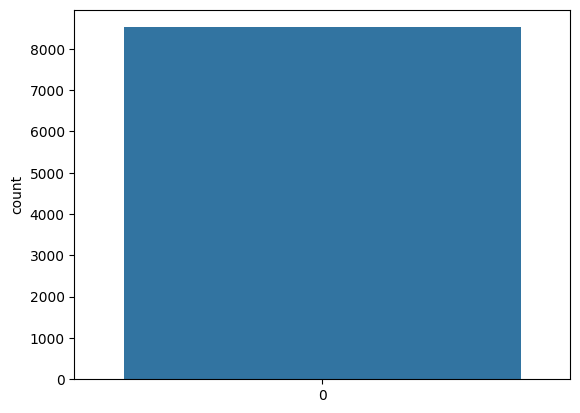

In [35]:
sns.countplot(df['Outlet_Establishment_Year'])

In [36]:
# sns.countplot(df['Outlet_Size'])

In [37]:
# sns.countplot(df['Outlet_Location_Type'])

In [38]:
# sns.countplot(df['Outlet_Type'])

<AxesSubplot: >

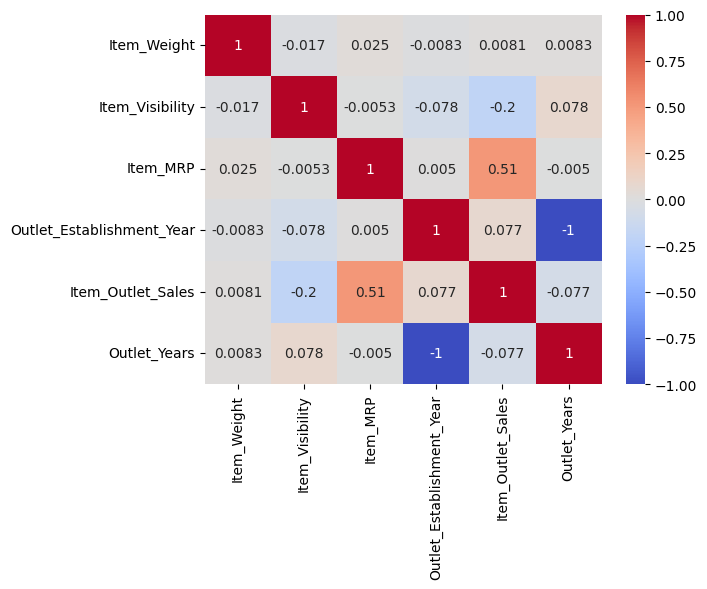

In [39]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
#check the values of the dataset.

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [41]:
#Label Encoding

#Label encoding is to convert the categorical column into the numerical column.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [42]:
#One Hot Encoding

#We can also use one hot encoding for the categorical columns.

df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [43]:
#Splitting the data for Training and Testing

# drop some columns before training our model.

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [44]:
#model training
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)   

Model Report
MSE: 0.2880065032501795
CV Score: 0.2891182742641596


<AxesSubplot: title={'center': 'Model Coefficients'}>

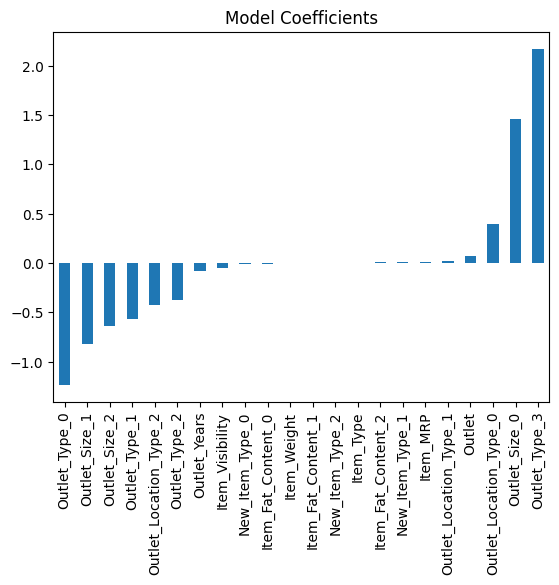

In [45]:
#Linear Regression:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2881919345594854
CV Score: 0.2893004256508473


<AxesSubplot: title={'center': 'Model Coefficients'}>

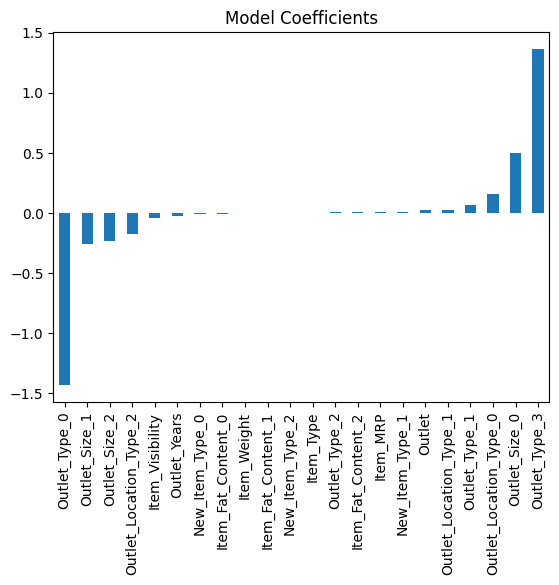

In [46]:
#Ridge
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot: title={'center': 'Model Coefficients'}>

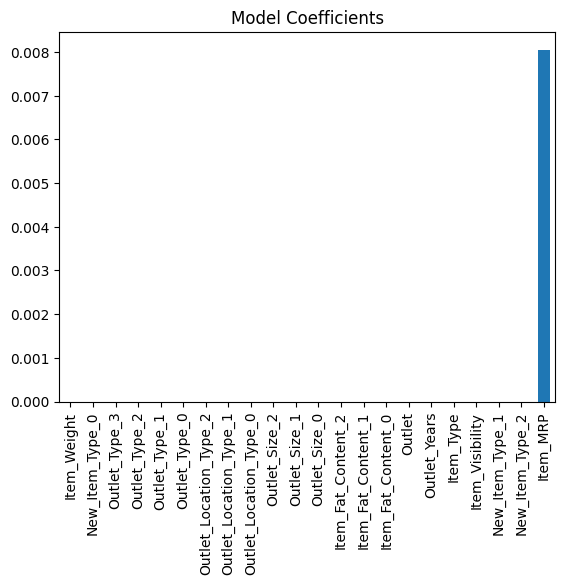

In [47]:
#Lasso:

model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5752869952029941


<AxesSubplot: title={'center': 'Feature Importance'}>

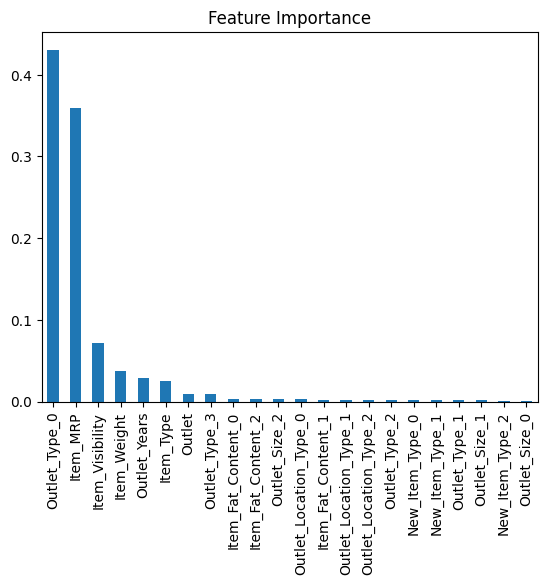

In [48]:
#Decision Tree:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.04256832937525895
CV Score: 0.3098870247902171


<AxesSubplot: title={'center': 'Feature Importance'}>

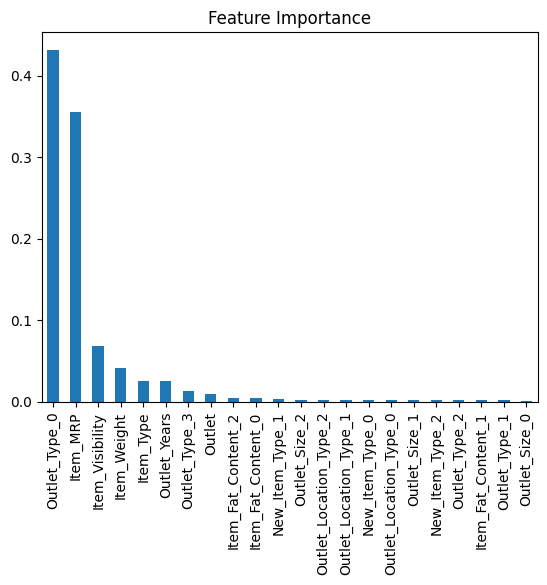

In [49]:
#Random Forest:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 1.041778615391114e-28
CV Score: 0.3309844678945605


<AxesSubplot: title={'center': 'Feature Importance'}>

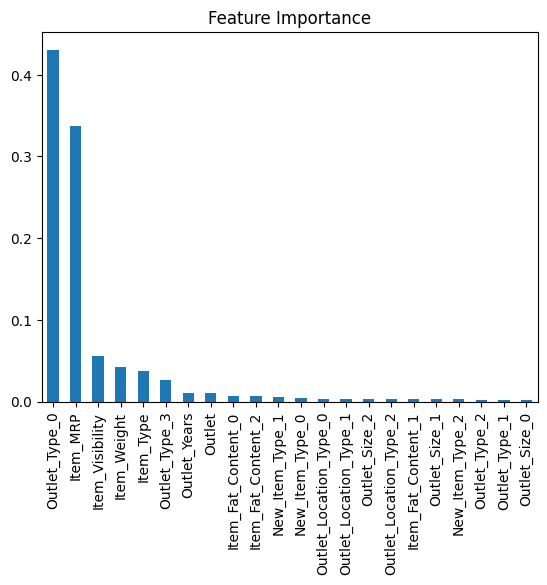

In [50]:
#Extra Trees:

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the model object
model = RandomForestRegressor()

# Create the GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error',n_jobs = -1, verbose=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X, y)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.309 total time=   4.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.293 total time=   4.5s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.327 total time=   4.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.318 total time=   3.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.289 total time=   3.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.307 total time=   8.5s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.321 total time=   8.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.294 total time=   8.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.307 total time=   3.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.321 total time=  12.5s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.294 total time=  12.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.318 total time=   7.2s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.304 total time=   6.9s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.290 total time=   7.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.313 total time=   3.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.308 total time=  11.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.285 total time=   2.9s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.297 total time=   2.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.318 total time=  10.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.311 total time=   5.7s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.283 total time=   5.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.290 total time=   9.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.295 total time=   5.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.303 total time=   9.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.317 total time=   2.9s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.288 total time=   2.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.302 total time=   3.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.311 total time=   8.2s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.284 total time=   8.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.295 total time=   8.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.315 total time=   5.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.287 total time=   5.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.316 total time=   2.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.287 total time=   2.9s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.300 total time=   5.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.301 total time=   2.9s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.315 total time=   8.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.287 total time=   8.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.313 total time=   5.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.287 total time=   5.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.301 total time=   8.9s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.298 total time=   5.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.308 total time=   2.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.283 total time=   2.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.292 total time=   2.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.315 total time=   8.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.286 total time=   8.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.307 total time=   5.3s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.281 total time=   5.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.292 total time=   5.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.306 total time=   2.6s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.299 total time=   8.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.281 total time=   2.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.290 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.309 total time=   8.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.281 total time=   8.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.307 total time=   5.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.292 total time=   8.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.280 total time=   5.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.291 total time=   5.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.307 total time=   2.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.280 total time=   2.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.291 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.307 total time=   7.6s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.280 total time=   7.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.306 total time=   5.1s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.280 total time=   5.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.291 total time=   7.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.291 total time=   5.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.305 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.280 total time=   2.5s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.289 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.306 total time=   7.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.279 total time=   7.6s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.305 total time=   5.0s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.310 total time=   0.9s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.293 total time=   0.9s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.290 total time=   7.6s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.297 total time=   0.9s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.279 total time=   5.0s
[CV 3/3] END max_d

/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.282 total time=   2.0s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.301 total time=   1.3s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.282 total time=   1.4s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.282 total time=   1.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.289 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.300 total time=   2.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.269 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.266 total time=   1.2s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.283 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.283 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.288 total time=   1.2s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.288 total time=   2.4s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.267 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.266 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.269 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.269 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.288 total time=   3.6s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.269 total time=   3.6s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.266 total time=   3.7s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.266 total time=   2.4s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.288 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.269 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.289 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.267 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.269 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.288 total time=   3.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.266 total time=   3.5s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.288 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.266 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.269 total time=   3.6s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.269 total time=   2.4s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.289 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.266 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.270 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.266 total time=   3.6s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.288 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.269 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.288 total time=   2.4s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.269 total time=   2.4s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.266 total time=   2.4s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.289 total time=   1.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.266 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.270 total time=   1.2s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.288 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.266 total time=   3.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.288 total time=   2.4s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.266 total time=   2.4s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.269 total time=   3.5s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.269 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.289 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.267 total time=   1.2s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.269 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.288 total time=   3.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.266 total time=   3.6s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.288 total time=   2.4s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.269 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.266 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.269 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.288 total time=   1.2s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.266 total time=   1.3s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.269 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.288 total time=   3.6s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.266 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.288 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.269 total time=   3.6s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.266 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.269 total time=   2.4s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.288 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.266 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.270 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.266 total time=   3.6s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.288 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.288 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.269 total time=   3.6s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.266 total time=   2.5s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.269 total time=   2.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.288 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.266 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.270 total time=   1.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.288 total time=   3.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.266 total time=   3.6s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.375 total time=   0.4s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.288 total time=   2.4s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.266 total time=   2.4s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.379 total time=   0.4s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.269 total time=   2.4s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.269 total time=   3.6s
[CV 3/3] END max_depth=5, max_features

/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.373 total time=   0.8s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.361 total time=   0.8s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.356 total time=   1.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.354 total time=   0.8s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.366 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.380 total time=   1.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=-0.350 total time=   1.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.301 total time=   2.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.273 total time=   2.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.282 total time=   2.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.299 total time=   2.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.272 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.299 total time=   4.3s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.273 total time=   4.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.282 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.282 total time=   2.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.299 total time=   6.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.272 total time=   6.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.281 total time=   6.3s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.299 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.272 total time=   4.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.280 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.296 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.272 total time=   2.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.277 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.299 total time=   6.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.272 total time=   6.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.297 total time=   4.1s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.271 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.280 total time=   6.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.278 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.297 total time=   2.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.272 total time=   2.5s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.281 total time=   2.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.270 total time=   6.6s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.297 total time=   6.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.278 total time=   6.9s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.297 total time=   4.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.271 total time=   5.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.298 total time=   2.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.280 total time=   4.8s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.271 total time=   2.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.279 total time=   2.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.299 total time=   6.8s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.271 total time=   6.7s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.298 total time=   4.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.280 total time=   6.5s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.271 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.280 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.297 total time=   2.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.270 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.278 total time=   2.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.298 total time=   6.3s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.271 total time=   6.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.296 total time=   4.5s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.270 total time=   4.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.279 total time=   4.4s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.279 total time=   6.6s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.296 total time=   2.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.271 total time=   2.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.277 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.296 total time=   6.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.271 total time=   6.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.296 total time=   4.2s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.270 total time=   4.2s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.278 total time=   6.5s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.277 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.296 total time=   2.1s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.271 total time=   2.1s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.278 total time=   2.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.296 total time=   6.4s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.270 total time=   6.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.296 total time=   4.4s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.271 total time=   4.2s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.277 total time=   6.4s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.278 total time=   4.3s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.295 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.270 total time=   2.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.277 total time=   2.0s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.297 total time=   6.3s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.270 total time=   6.3s


/Users/cristopher/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.295 total time=   4.5s
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.305 total time=   0.9s
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.290 total time=   0.6s
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.291 total time=   0.7s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.270 total time=   4.5s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.278 total time=   6.5s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.278 total time=   4.6s
[CV 1/3] END max_depth=10, max_

In [62]:
# Use the best estimator for prediction
y= best_estimator.predict(X[0:1])
print(f'predict: {y}')
print(f'best_params: {best_params}')
print(f'best_score: {best_score}')

predict: [8.14841034]
best_params: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
best_score: -0.2742837663920455


In [1]:
y

NameError: name 'y' is not defined

In [61]:
df.iloc[0]

Item_Identifier                 FDA15
Item_Weight                       9.3
Item_Visibility              0.016047
Item_Type                           4
Item_MRP                     249.8092
Outlet_Identifier              OUT049
Outlet_Establishment_Year        1999
Item_Outlet_Sales            8.225808
Outlet_Years                       14
Outlet                              9
Item_Fat_Content_0                  1
Item_Fat_Content_1                  0
Item_Fat_Content_2                  0
Outlet_Size_0                       0
Outlet_Size_1                       1
Outlet_Size_2                       0
Outlet_Location_Type_0              1
Outlet_Location_Type_1              0
Outlet_Location_Type_2              0
Outlet_Type_0                       0
Outlet_Type_1                       1
Outlet_Type_2                       0
Outlet_Type_3                       0
New_Item_Type_0                     0
New_Item_Type_1                     1
New_Item_Type_2                     0
Name: 0, dty